<a href="https://colab.research.google.com/github/Limonsitox/StephaniF-SSF-oto24-Stehani-Vianey-Francisco-Limon/blob/main/T9_SSF_OTO%C3%91O24_STEPHANI_VIANEY_FRANCISCO_LIMOMN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Por favor, sube el archivo 't9.xlsx':


Saving t9.xlsx to t9 (1).xlsx
Nombres de las columnas en el dataset:
Index(['Sex', 'Age', 'BADS-SF', 'BADS-SF_Activation', 'BADS-SF_Avoidance',
       'CES-D', 'WHOQOL-26_Mean total score', 'WHOQOL-26_Phisical health',
       'WHOQOL-26_Psychological health', 'WHOQOL-26_Social relationships',
       'WHOQOL-26_Environment', 'WHOQOL-26_Overall QOL'],
      dtype='object')

Vista previa del dataset:
   Sex  Age  BADS-SF  BADS-SF_Activation  BADS-SF_Avoidance  CES-D  \
0    2   20       37                  22                  3      1   
1    2   18       33                  17                  2      2   
2    1   19       30                  20                  8      2   
3    1   19       23                  11                  6      3   
4    2   18       35                  19                  2      3   

   WHOQOL-26_Mean total score  WHOQOL-26_Phisical health  \
0                    4.500000                   4.833333   
1                    3.307692                   3.166667  

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


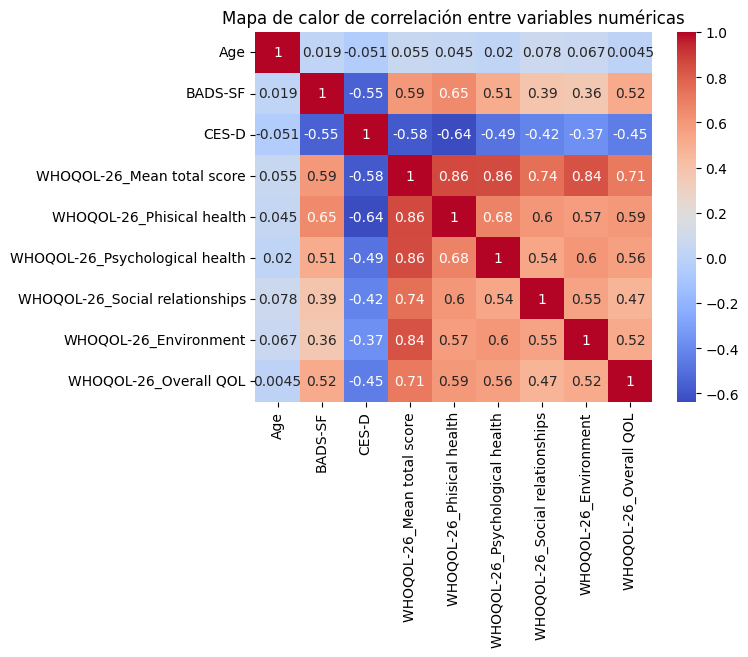


Distribución de la variable categórica Sex:
Sex
2    128
1     93
Name: count, dtype: int64


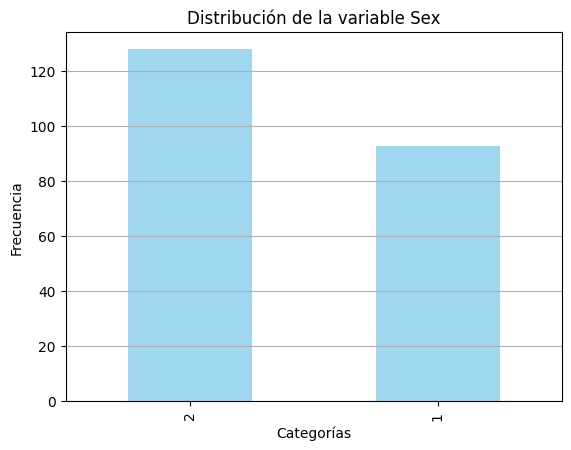


Resultados de la prueba T para Sex y Age:
Estadístico t: -3.1242, p-valor: 0.0021
Hay evidencia para rechazar la hipótesis nula (diferencia significativa).


In [ ]:
# Paso 1: Configuración e importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Paso 2: Cargar los datos
# Subir el archivo llamado t9.xlsx
from google.colab import files

print("Por favor, sube el archivo 't9.xlsx':")
uploaded = files.upload()

# Leer el archivo Excel subido
data = pd.read_excel("t9.xlsx")

# Paso 3: Exploración inicial de los datos
print("Nombres de las columnas en el dataset:")
print(data.columns)

print("\nVista previa del dataset:")
print(data.head())

print("\nInformación general del dataset:")
print(data.info())

print("\nEstadísticas descriptivas:")
print(data.describe())

# Paso 4: Selección de variables a analizar
# En este caso, seleccionamos algunas columnas numéricas y la variable categórica 'Sex'
numerical_columns = ['Age', 'BADS-SF', 'CES-D', 'WHOQOL-26_Mean total score', 'WHOQOL-26_Phisical health', 'WHOQOL-26_Psychological health', 'WHOQOL-26_Social relationships', 'WHOQOL-26_Environment', 'WHOQOL-26_Overall QOL']
categorical_column = 'Sex'

# Paso 5: Análisis de correlación entre variables numéricas
print("\nCorrelación entre variables numéricas:")
correlation = data[numerical_columns].corr()
print(correlation)

# Visualización de la correlación
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlación entre variables numéricas')
plt.show()

# Paso 6: Análisis de distribución de la variable categórica
print(f"\nDistribución de la variable categórica {categorical_column}:")
category_counts = data[categorical_column].value_counts()
print(category_counts)

# Gráfica de barras para la distribución
category_counts.plot(kind='bar', color='skyblue', alpha=0.8)
plt.title(f'Distribución de la variable {categorical_column}')
plt.xlabel('Categorías')
plt.ylabel('Frecuencia')
plt.grid(axis='y')
plt.show()

# Paso 7: Prueba estadística (ejemplo: comparación de medias para dos grupos categóricos)
grouped = data.groupby(categorical_column)[numerical_columns[0]].apply(list)
if len(grouped) == 2:  # Verificamos que haya exactamente dos grupos
    group1, group2 = grouped
    t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
    print(f"\nResultados de la prueba T para {categorical_column} y {numerical_columns[0]}:")
    print(f"Estadístico t: {t_stat:.4f}, p-valor: {p_value:.4f}")
    if p_value < 0.05:
        print("Hay evidencia para rechazar la hipótesis nula (diferencia significativa).")
    else:
        print("No se puede rechazar la hipótesis nula (no hay diferencia significativa).")
else:
    print("No hay exactamente dos grupos en la variable categórica para realizar la prueba T.")
